## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AAIC/Assignments/10.Behavior of Linear Models/practice/task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# TASK-1 (Logistic Regression)

In [ ]:
pip install colorama

In [ ]:
from sklearn.metrics import log_loss, make_scorer,hinge_loss,roc_auc_score,confusion_matrix,accuracy_score
import seaborn as sns
#import colorama
from colorama import Fore, Style
import math as m

def plot(r,x_ax):
  plt.xlabel('Hyper-Param\'s in Log-space')
  plt.ylabel('AUC-Score')
  plt.plot(x_ax,r['mean_train_score'],'-o',label='tr-scores')
  plt.plot(x_ax,r['mean_test_score'],'-o',label='cv-scores')
  plt.grid()
  plt.legend()
  plt.show()
  return 

def fun(best_model,X_train,Y_train,X_test,Y_test):
  best_model.fit(X_train,Y_train)
  W = best_model.coef_
  print('*'*100)
  print(f"{Fore.BLUE}Best_Model:{Style.RESET_ALL}") #https://stackoverflow.com/questions/39473297/how-do-i-print-colored-output-with-python-3
  print(best_model.get_params)
  print('*'*100)
  print(f"{Fore.BLUE}Best_Model_Weights:{Style.RESET_ALL}",'\n',W)
  print('*'*100)
  #cm = (confusion_matrix(Y_test,best_model.predict(X_test)))
  #sns.heatmap(cm,annot=True)
  #plt.show()
  best_model_accuraccy = accuracy_score(Y_test,best_model.predict(X_test))
  print(f"{Fore.BLUE}Best_Model_Accuraccy:{Style.RESET_ALL}",'\n',best_model_accuraccy)
  print('*'*100)
  return W,best_model_accuraccy

def train(loss_,X_train,Y_train,X_test,Y_test):
  params = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000],
            #'eta0' : [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000]
            }
  x_ax = [m.log(x) for x in params['alpha']]
  if loss_== log_loss:
    l = 'log'
  else:
    l = 'hinge'
  
  model = GridSearchCV(estimator=SGDClassifier(loss=l,n_jobs=-1),
                       return_train_score=True,param_grid=params,scoring=make_scorer(roc_auc_score),
                       n_jobs=-1,cv=10
                       )
  model.fit(X_train,Y_train)
  r = pd.DataFrame(model.cv_results_)
  plot(r,x_ax)
  best_model = model.best_estimator_
  
  return best_model



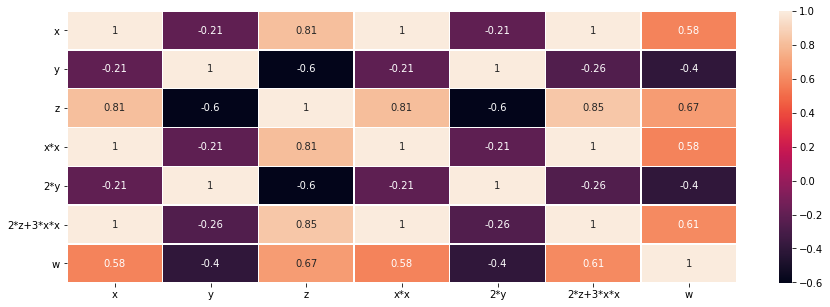

In [ ]:
X = data.drop(['target'], axis=1)
Y = data['target']

fig, ax = plt.subplots(figsize=(15,5))         
sns.heatmap(X.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()
  

## Training on Original Data

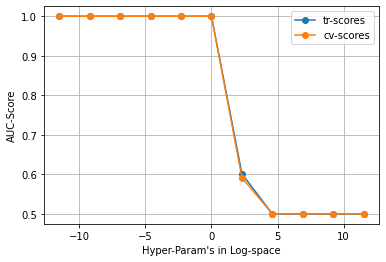

****************************************************************************************************
Best_Model:
<bound method BaseEstimator.get_params of SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>
****************************************************************************************************
Best_Model_Weights: 
 [[ 20.77826339 -21.992494    27.77353984  20.28805504 -21.992494
   21.61259704  27.03731201]]
****************************************************************************************************
Best_Model_Accuraccy: 
 1.0
******************************************************************************

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.25,random_state=42)

best_model = train(loss_=log_loss,X_train=x_train,Y_train=y_train,X_test=x_test,Y_test=y_test)
W,best_model_accuraccy = fun(best_model,x_train,y_train,x_test,y_test)

## Training on Perturbated data

In [ ]:
X_dash = X + (10**(-2))
x_train, x_test, y_train, y_test = train_test_split(X_dash, Y,stratify=Y,test_size=0.25,random_state=42)

W_dash,best_model_accuraccy_edited = fun(best_model,x_train,y_train,x_test,y_test)

****************************************************************************************************
Best_Model:
<bound method BaseEstimator.get_params of SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>
****************************************************************************************************
Best_Model_Weights: 
 [[  2.08950276 -20.30395522  19.13797837   1.41465907 -20.30395522
    3.58257832  -0.51286348]]
****************************************************************************************************
Best_Model_Accuraccy: 
 0.96
***************************************************************************

## Comparing results


In [ ]:
def top_feat(best_model_accuraccy_edited,best_model_accuraccy,W,W_dash):
  print(f"{Fore.BLUE}best_model_accuraccy_edited - best_model_accuraccy:{Style.RESET_ALL}",'\n',best_model_accuraccy_edited-best_model_accuraccy,'\n')
  print(f"{Fore.BLUE}abs(W-W_dash):{Style.RESET_ALL}",'\n',abs(W-W_dash),'\n')
  ind = list((np.argsort(-(abs(W-W_dash)/W)*100))[0])
  feat = X.columns.to_list()
  print(f"{Fore.BLUE}Top-feat:{Style.RESET_ALL}",)
  return [print(feat[i]) for i in ind[:4]]
top_feat(best_model_accuraccy_edited,best_model_accuraccy,W,W_dash)

best_model_accuraccy_edited - best_model_accuraccy: 
 -0.040000000000000036 

abs(W-W_dash): 
 [[18.68876063  1.68853879  8.63556146 18.87339596  1.68853879 18.03001872
  27.55017549]] 

Top-feat:
w
x*x
x
2*z+3*x*x


[None, None, None, None]

# Task-2 (Linear SVM)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AAIC/Assignments/10.Behavior of Linear Models/practice/task_d.csv')
X = data.drop(['target'], axis=1)
Y = data['target']

## Training on Original Data 

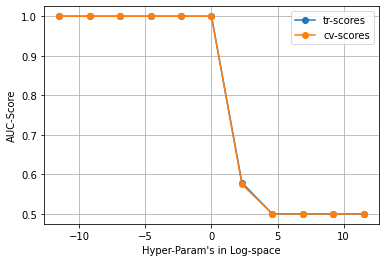

****************************************************************************************************
Best_Model:
<bound method BaseEstimator.get_params of SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>
****************************************************************************************************
Best_Model_Weights: 
 [[  9.45220176 -23.93918264  10.83878558   9.8256722  -23.93918264
   10.15178602  22.66053126]]
****************************************************************************************************
Best_Model_Accuraccy: 
 0.96
*************************************************************************

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.25,random_state=42)

best_model = train(loss_=hinge_loss,X_train=x_train,Y_train=y_train,X_test=x_test,Y_test=y_test)
W,best_model_accuraccy = fun(best_model,x_train,y_train,x_test,y_test)

## Training on perturbated data

In [ ]:
X_dash = X + (10**(-2))
x_train, x_test, y_train, y_test = train_test_split(X_dash, Y,stratify=Y,test_size=0.25,random_state=42)

W_dash,best_model_accuraccy_edited = fun(best_model,x_train,y_train,x_test,y_test)

****************************************************************************************************
Best_Model:
<bound method BaseEstimator.get_params of SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>
****************************************************************************************************
Best_Model_Weights: 
 [[ 10.19105311 -34.15004656  38.34742036  10.34878513 -34.15004656
   13.94376968  19.4740285 ]]
****************************************************************************************************
Best_Model_Accuraccy: 
 0.96
*************************************************************************

## Comparing Results

In [ ]:
top_feat(best_model_accuraccy_edited,best_model_accuraccy,W,W_dash)

best_model_accuraccy_edited - best_model_accuraccy: 
 0.0 

abs(W-W_dash): 
 [[ 0.73885135 10.21086392 27.50863478  0.52311293 10.21086392  3.79198365
   3.18650276]] 

Top-feat:
z
2*z+3*x*x
w
x


[None, None, None, None]